<a href="https://colab.research.google.com/github/mariavirna/An-lise-tratamento-e-visualiza-o-de-dados/blob/main/Tratamento_e_Visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import seaborn as se
import statistics as st

In [70]:
# Importa os dados
tempo = pd.read_excel ("/content/drive/MyDrive/Colab Notebooks/tempo.xlsx")

In [71]:

# Visualiza os dados
tempo
tempo.head(20)
tempo.tail(20)
tempo.sample(20)

,ï»¿Appearance,Temperature,Humidity,Wind,Play
17,sols,64,95,sim,sim
14,sol,61,92,sim,sim
10,sol,75,70,sim,sim
13,chuva,71,91,sim,nÃ£o
7,sol,1220,95,nÃ£o,nÃ£o
5,chuva,79,70,sim,sim
6,menos,64,65,sim,sim
1,sol,80,90,sim,nÃ£o
15,sol,62,93,sim,sim
2,nublado,83,86,nÃ£o,sim


In [72]:
# Verifica o tamanho com as quantidades de linhas e colunas
tempo.shape

(20, 5)

In [73]:
# Dá nomes às colunas
tempo.columns = ["condição de tempo",
      "temperatura", "umidade", "vento",
      "jogar"]

In [74]:
# Visualiza os dados
tempo.head(20)

,condição de tempo,temperatura,umidade,vento,jogar
0,sol,85,85,nÃ£o,nÃ£o
1,sol,80,90,sim,nÃ£o
2,nublado,83,86,nÃ£o,sim
3,chuva,70,68,nÃ£o,sim
4,chuva,68,80,nÃ£o,NaN
5,chuva,79,70,sim,sim
6,menos,64,65,sim,sim
7,sol,1220,95,nÃ£o,nÃ£o
8,sol,65,70,nÃ£o,sim
9,chuva,75,650,nÃ£o,sim


In [75]:
# Mostra se existe valores nulos ou não disponíveis (NAN)
tempo.isnull().sum()

,0
condição de tempo,0
temperatura,0
umidade,0
vento,0
jogar,1


In [76]:
# Agrupa a coluna jogar
tempo['jogar'].describe()

,jogar
count,19
unique,2
top,sim
freq,15


In [77]:
# Calcula a moda da variável "jogar"
moda = st.mode(tempo['jogar'])
moda

'sim'

In [78]:
# Substitui os valores nulos pela moda
tempo['jogar'].fillna(moda, inplace=True)

<ipython-input-78-36f08b709eb5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tempo['jogar'].fillna(moda, inplace=True)


In [79]:
# Mostra se existe valores nulos ou não disponíveis (NAN)
tempo.isnull().sum()

,0
condição de tempo,0
temperatura,0
umidade,0
vento,0
jogar,0


In [80]:
# Mostra se existe valores nulos ou não disponíveis (NAs) na coluna 'jogar'
tempo['jogar'].isnull().sum()

np.int64(0)

In [81]:
# Visualiza a coluna 'jogar' agrupada e sua quantidade
jogar = tempo.groupby(['jogar']).size()
jogar

,0
jogar,
nÃ£o,4
sim,16


In [82]:
# Se o valor de 'jogar' for 'nÃ£o', substituirá na coluna 'jogar' o valor 'não'
tempo.loc[tempo['jogar'] == 'nÃ£o', 'jogar'] = 'não'

In [83]:
# Visualiza a coluna 'jogar' agrupada e sua quantidade
jogar = tempo.groupby(['jogar']).size()
jogar

,0
jogar,
não,4
sim,16


In [84]:
# Visualiza a coluna 'vento' agrupada e sua quantidade
vento = tempo.groupby(['vento']).size()
vento

,0
vento,
nÃ£o,8
sim,12


In [85]:
# Se o valor de 'vento' for 'nÃ£o', substituirá na coluna 'vento' o valor 'não'
tempo.loc[tempo['vento'] == 'nÃ£o', 'vento'] = 'não'

In [86]:
# Visualiza a coluna 'vento' agrupada e sua quantidade
vento = tempo.groupby(['vento']).size()
vento

,0
vento,
não,8
sim,12


In [87]:
# Visualiza a coluna 'condição de tempo' agrupada e sua quantidade
condicao_de_tempo = tempo.groupby(['condição de tempo']).size()
condicao_de_tempo

,0
condição de tempo,
chuva,5
menos,1
nublado,3
sol,9
sols,2


In [88]:
# Calcula a moda da variável "condição de tempo"
moda = st.mode(tempo['condição de tempo'])
moda

'sol'

In [89]:
# Se o valor de 'condição de tempo' for 'sols' ou 'menos', substituirá na coluna 'condição de tempo' o valor 'sol'
tempo.loc[tempo['condição de tempo'] == 'sols', 'condição de tempo'] = 'sol'
tempo.loc[tempo['condição de tempo'] == 'menos', 'condição de tempo'] = 'sol'

In [90]:
# Visualiza a coluna 'condição de tempo' agrupada e sua quantidade
condicao_de_tempo = tempo.groupby(['condição de tempo']).size()
condicao_de_tempo

,0
condição de tempo,
chuva,5
nublado,3
sol,12


In [91]:
# Mostra os dados estatísticos da 'umidade
tempo['umidade'].describe()

,umidade
count,20.00000
mean,112.60000
std,126.95312
min,65.00000
25%,73.75000
50%,90.00000
75%,94.25000
max,650.00000


In [92]:
# Localiza os dados de 'umidade' menores que 0 e maiores que 100
tempo.loc[(tempo['umidade'] <= 0) | (tempo['umidade'] > 100)]

,condição de tempo,temperatura,umidade,vento,jogar
9,chuva,75,650,não,sim


In [93]:
# Calcula a mediana
mediana = st.median(tempo['umidade'])
mediana

90.0

In [94]:
# Substitui os valores de 'umidade' pela mediana
tempo.loc[(tempo['umidade'] <= 0) | (tempo['umidade'] > 100), 'umidade'] = mediana

In [95]:
# Localiza os dados de 'umidade' menores que 0 e maiores que 100
tempo.loc[(tempo['umidade'] <= 0) | (tempo['umidade'] > 100)]

,condição de tempo,temperatura,umidade,vento,jogar


In [96]:
# Mostra os dados estatísticos da 'temperatura'
tempo['temperatura'].describe()

,temperatura
count,20.000000
mean,128.450000
std,257.033579
min,61.000000
25%,64.750000
50%,70.500000
75%,79.250000
max,1220.000000


In [97]:
# Localiza os dados de 'temperatura' menores que 0 e maiores que 120
tempo.loc[(tempo['temperatura'] <= 0) | (tempo['temperatura'] > 120)]

,condição de tempo,temperatura,umidade,vento,jogar
7,sol,1220,95,não,não


In [98]:
# Calcula a mediana
mediana = st.median(tempo['temperatura'])
mediana

70.5

In [99]:
# Substitui os valores de 'temperatura' pela mediana que 120
tempo.loc[(tempo['temperatura'] <= 0) | (tempo['temperatura'] > 120), 'temperatura'] = mediana

<ipython-input-99-17743d05011d>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tempo.loc[(tempo['temperatura'] <= 0) | (tempo['temperatura'] > 120), 'temperatura'] = mediana


In [100]:
# Localiza os dados de 'temperatura' menores que 0 e maiores que 120
tempo.loc[(tempo['temperatura'] <= 0) | (tempo['temperatura'] > 120)]

,condição de tempo,temperatura,umidade,vento,jogar


In [101]:
# Identificar todas as duplicatas com base nas colunas principais
tempo.loc[tempo.duplicated(['condição de tempo', 'temperatura', 'umidade', 'vento', 'jogar'], keep=False)]

,condição de tempo,temperatura,umidade,vento,jogar


In [102]:
# Visualiza os dados
tempo.head(20)

,condição de tempo,temperatura,umidade,vento,jogar
0,sol,85.0,85,não,não
1,sol,80.0,90,sim,não
2,nublado,83.0,86,não,sim
3,chuva,70.0,68,não,sim
4,chuva,68.0,80,não,sim
5,chuva,79.0,70,sim,sim
6,sol,64.0,65,sim,sim
7,sol,70.5,95,não,não
8,sol,65.0,70,não,sim
9,chuva,75.0,90,não,sim


In [103]:
# Visualiza a frequência de cada categoria na coluna 'jogar'
pd.Series(tempo['jogar']).value_counts()

,count
jogar,
sim,16
não,4


<Axes: xlabel='jogar'>

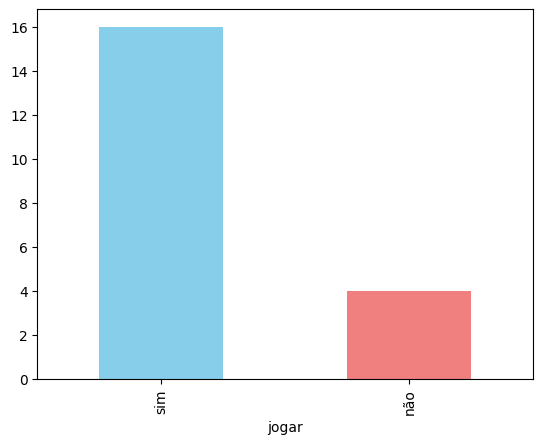

In [104]:
# Visualiza através de um gráfico de barra a frequência de cada categoria na coluna 'jogar'
pd.Series(tempo['jogar']).value_counts().plot.bar(color=['skyblue', 'lightcoral'])

In [105]:
# Visualiza a frequência de cada categoria na coluna 'condição de tempo'
pd.Series(tempo['condição de tempo']).value_counts()

,count
condição de tempo,
sol,12
chuva,5
nublado,3


<Axes: xlabel='condição de tempo'>

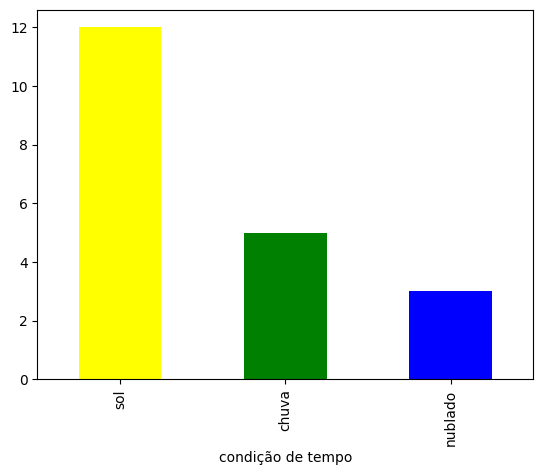

In [106]:
# Visualiza através de um gráfico de barra a frequência de cada categoria na coluna 'condição de tempo'
pd.Series(tempo['condição de tempo']).value_counts().plot.bar(color=['yellow', 'green','blue'])

In [107]:
# Visualiza a frequência de cada categoria na coluna 'Vento'
pd.Series(tempo['vento']).value_counts()

,count
vento,
sim,12
não,8


<Axes: xlabel='vento'>

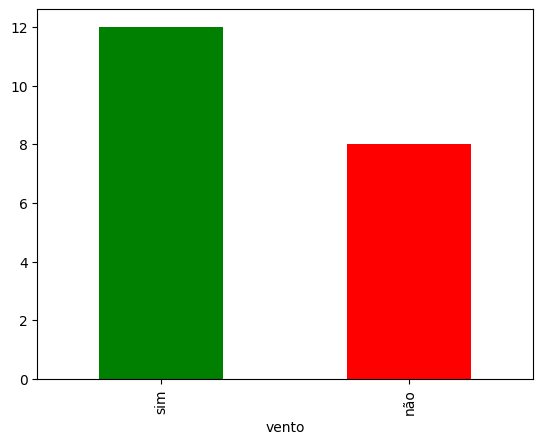

In [108]:
# Visualiza através de um gráfico de barra a frequência de cada categoria na coluna 'vento'
pd.Series(tempo['vento']).value_counts().plot.bar(color=['green','red'])

In [109]:
# Visualiza a frequência de cada categoria na coluna 'umidade'
pd.Series(tempo['umidade']).value_counts()

,count
umidade,
90,3
70,3
95,2
86,1
68,1
80,1
85,1
65,1
75,1


<Axes: xlabel='umidade'>

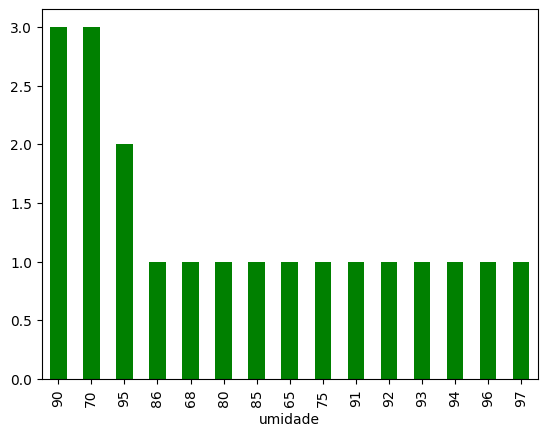

In [110]:
# Visualiza através de um gráfico de barra a frequência de cada categoria na coluna 'umidade'
pd.Series(tempo['umidade']).value_counts().plot.bar(color=['green'])

In [111]:
# Visualiza a frequência de cada categoria na coluna 'temperatura'
pd.Series(tempo['temperatura']).value_counts()

,count
temperatura,
65.0,2
75.0,2
64.0,2
85.0,1
80.0,1
68.0,1
70.0,1
79.0,1
83.0,1


<Axes: xlabel='temperatura'>

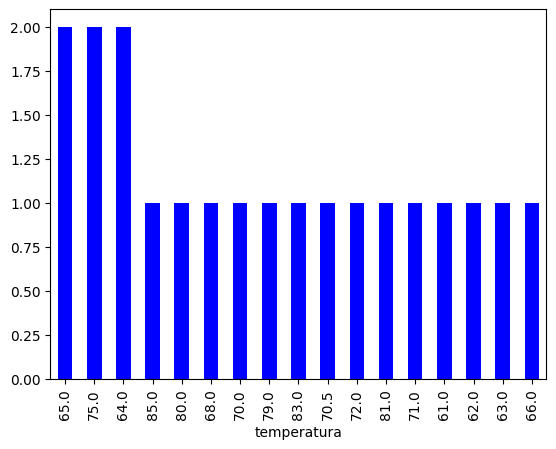

In [112]:
# Visualiza através de um gráfico de barra a frequência de cada categoria na coluna 'temperatura'
pd.Series(tempo['temperatura']).value_counts().plot.bar(color=['blue'])

<Axes: xlabel='condição de tempo', ylabel='temperatura'>

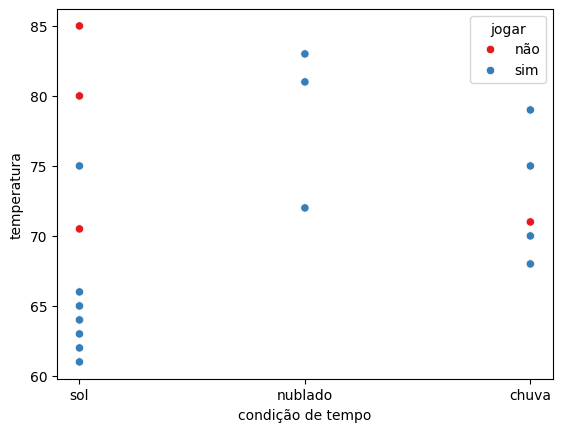

In [113]:
# Gráfico de dispersão que mostra como a temperatura varia em função da condição de tempo, e como isso se relaciona com a decisão de jogar ou não.
'''
Interpretação:
Em dias de sol, há mais decisões de não jogar quando a temperatura está alta.

Em dias nublados, sempre se joga, independentemente da temperatura.

Em dias de chuva, a maioria decide jogar, mesmo com temperatura moderada a alta.

Temperaturas mais baixas ocorrem apenas em dias de sol, e nesses casos se joga.

'''

se.scatterplot(data=tempo, x='condição de tempo', y='temperatura', hue='jogar' , palette='Set1')

<Axes: xlabel='condição de tempo', ylabel='vento'>

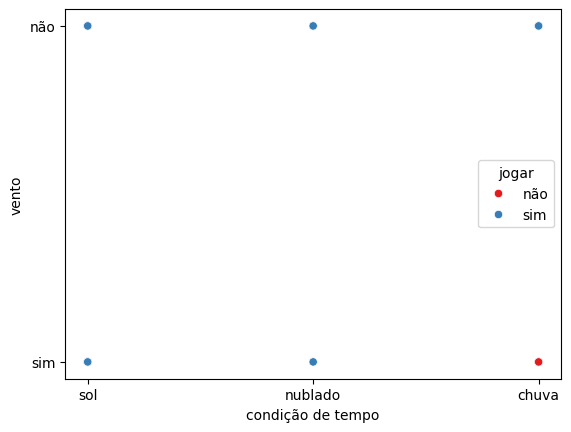

In [114]:
# Gráfico de dispersão que mostra como a condição de tempo varia em função do vento , e como isso se relaciona com a decisão de jogar ou não.
'''
Interpretação:
Quando não há vento, as pessoas jogam em qualquer condição de tempo.

Quando há vento e está chovendo, a decisão é não jogar.

Quando há vento e está ensolarado ou nublado, ainda assim se joga.
'''

se.scatterplot(data=tempo, x='condição de tempo', y='vento', hue='jogar' , palette='Set1')

<Axes: xlabel='temperatura', ylabel='umidade'>

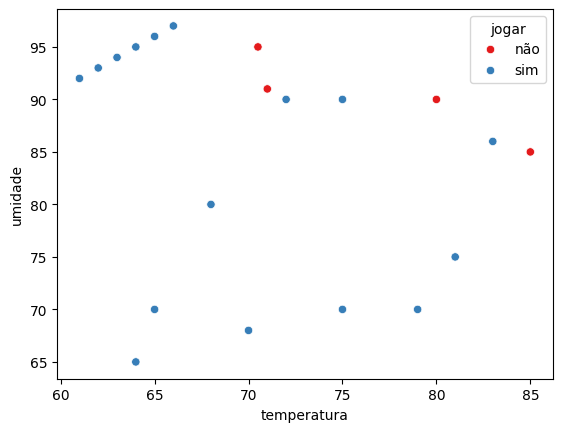

In [115]:
# Gráfico de dispersão que mostra como a condição de temperatura varia em função da umidade, e como isso se relaciona com a decisão de jogar ou não.
'''
Interpretação:
Há uma tendência de "jogar" ser sim com temperaturas mais baixas e umidade mais alta.
Há uma tendência de "jogar" ser não com temperaturas mais altas e umidade mais baixa.
A maioria dos "sim" ocorre com umidade acima de 90%, enquanto a maioria dos "não" ocorre com umidade abaixo de 90%.

'''

se.scatterplot(data=tempo, x='temperatura', y='umidade', hue='jogar' , palette='Set1')

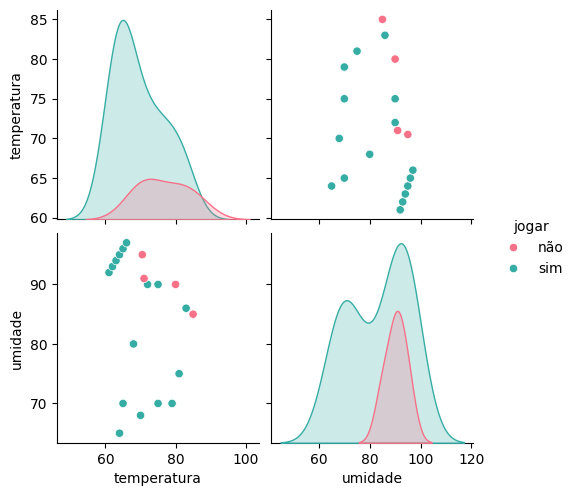

In [116]:
# Gera uma matriz de gráficos onde:
# Cada linha e coluna corresponde a uma das variáveis ('condição de tempo', 'temperatura', 'umidade', 'vento', 'jogar').
# A diagonal principal exibe a distribuição univariada de cada variável (ex.: histograma ou KDE).
# As células fora da diagonal mostram gráficos de dispersão bivariados:
# Exemplo: temperatura vs umidade.
# Cada ponto representa uma observação (ex.: uma situação climática), com cor diferenciando a decisão de jogar ou não.
'''
sns.pairplot(tempo[['condição de tempo', 'temperatura', 'umidade', 'vento', 'jogar']],
# tempo é o DataFrame usado, que está selecionando apenas 5 colunas para análise.

hue='jogar',
# Define a variável categórica usada para colorir os pontos nos gráficos de dispersão.

palette='husl'
# Define a paleta de cores: 'husl' fornece cores vivas e facilmente diferenciáveis.

Interpretação:
Quando a temperatura está entre 60 e 70, geralmente se joga.

Quando a temperatura está acima de 80, é mais comum não jogar.

A maior parte das decisões de jogar ocorre com umidade entre 60 e 95.

Quando a umidade ultrapassa 95, tende-se a não jogar.

A decisão de não jogar é mais frequente com alta umidade e alta temperatura combinadas.

'''

se.pairplot(tempo[['condição de tempo', 'temperatura', 'umidade', 'vento', 'jogar']], hue='jogar', palette='husl')